In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

# data loading

In [91]:
df = pd.read_csv('/content/phones clearned.csv')
df.shape

(984, 16)

In [92]:
df.isnull().sum()

model                0
brand                0
selling_price        0
sim type             0
is 5G                0
cores                0
RAM                  0
ROM                  0
battery_mAh          0
is_fast              0
display_size         0
refresh rate         0
notch                0
rear camera count    0
rear primary cam     0
front primary cam    0
dtype: int64

In [93]:
df.head(3)

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
0,OnePlus 11 5G,OnePlus,54999,Dual Sim,1,8,12 GB,256 GB,5000,1,6.70,120,Punch Hole,Triple,50.0,16.0
1,OnePlus Nord CE 2 Lite 5G,OnePlus,19989,Dual Sim,1,8,6 GB,128 GB,5000,1,6.59,120,Punch Hole,Triple,64.0,16.0
2,Samsung Galaxy A14 5G,Samsung,16499,Dual Sim,1,8,4 GB,64 GB,5000,1,6.60,90,Water Drop,Triple,50.0,13.0


# EDA

In [94]:
df['selling_price'].describe()

count       984.000000
mean      31372.305894
std       38638.415961
min         599.000000
25%       12977.750000
50%       19990.000000
75%       34990.000000
max      650000.000000
Name: selling_price, dtype: float64

In [95]:
df[df['selling_price']== 650000]

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
426,Vertu Signature Touch,Vertu,650000,Single Sim,0,8,2 GB,64 GB,2275,0,4.7,120,Punch Hole,Single,13.0,2.1


In [96]:
# price currected from internet
df['selling_price'].iloc[426] = 64990

<ipython-input-96-74a7ee9f332e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price'].iloc[426] = 64990


In [97]:
df['selling_price'].describe()

count       984.000000
mean      30777.783537
std       33232.580775
min         599.000000
25%       12977.750000
50%       19990.000000
75%       34990.000000
max      480000.000000
Name: selling_price, dtype: float64

In [98]:
sorted(list(df['selling_price']) , reverse=True)

[480000,
 214990,
 199990,
 182999,
 179900,
 172999,
 169900,
 169000,
 163980,
 162990,
 154998,
 149999,
 149900,
 147900,
 142990,
 139990,
 139900,
 134999,
 134999,
 129990,
 129990,
 129900,
 129900,
 124990,
 119990,
 119990,
 119990,
 119900,
 118999,
 118990,
 114990,
 113990,
 110999,
 109999,
 109990,
 109900,
 107990,
 106990,
 106990,
 105999,
 104999,
 104999,
 101999,
 99999,
 99990,
 99990,
 99990,
 95999,
 94990,
 94990,
 92999,
 92980,
 92249,
 91999,
 91999,
 89999,
 89999,
 89990,
 88999,
 86000,
 85990,
 84999,
 84990,
 84990,
 83000,
 82990,
 82990,
 82990,
 82990,
 82199,
 81999,
 79999,
 79990,
 79990,
 79700,
 78990,
 77990,
 75999,
 75999,
 75990,
 74999,
 74999,
 74999,
 73999,
 72999,
 72999,
 71999,
 71999,
 71999,
 70990,
 70990,
 70990,
 69999,
 69999,
 69999,
 69999,
 69999,
 69990,
 69990,
 69990,
 69990,
 69990,
 65999,
 65499,
 64999,
 64990,
 64900,
 64800,
 64449,
 63990,
 62999,
 61990,
 60999,
 60999,
 60999,
 60990,
 59999,
 59999,
 59999,
 5999

In [99]:
df[df['selling_price'].isin([480000,
 214990,
 199990,
 182999,
 179900,
 172999,
 169900,
 169000,
 163980,
 162990,]) ]

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
288,Apple iPhone 14 Pro Max (1TB),Apple,182999,Dual Sim,1,6,6 GB,1 TB,4323,1,6.70,120,Punch Hole,Triple,48.0,12.0
455,Xiaomi Mi Mix Alpha,Xiaomi,199990,Dual Sim,1,8,12 GB,512 GB,4050,1,7.92,120,Punch Hole,Triple,108.0,0.0
706,Huawei Mate Xs 2,Huawei,162990,Dual Sim,0,8,8 GB,512 GB,4600,1,7.80,120,Punch Hole,Triple,0.0,0.0
740,Apple iPhone 14 Pro Max (512GB),Apple,169900,Dual Sim,1,6,6 GB,512 GB,4323,1,6.70,120,Punch Hole,Triple,48.0,12.0
757,Apple iPhone 13 Pro Max (1TB),Apple,179900,Dual Sim,1,6,6 GB,1 TB,4352,1,6.70,120,Small,Triple,12.0,12.0
790,Apple iPhone 14 Pro (1TB),Apple,172999,Dual Sim,1,6,6 GB,1 TB,3200,1,6.10,120,Punch Hole,Triple,48.0,12.0
890,Xiaomi Redmi K20 Pro Signature Edition,Xiaomi,480000,Dual Sim,0,8,8 GB,256 GB,4000,1,6.39,120,Punch Hole,Triple,48.0,20.0
909,Samsung Galaxy Z Fold 4 (12GB RAM + 1TB),Samsung,163980,Dual Sim,1,8,12 GB,1 TB,4400,1,7.60,120,Punch Hole,Triple,0.0,0.0
955,Huawei Mate 30 RS Porsche Design,Huawei,214990,Dual Sim,1,8,12 GB,512 GB,4500,1,6.53,120,Large,Quad,40.0,32.0
958,Huawei Mate X,Huawei,169000,Dual Sim,1,8,8 GB,512 GB,4500,1,8.00,120,Punch Hole,Triple,0.0,0.0


In [100]:
df['selling_price'].iloc[890] = 31999

<ipython-input-100-0561d3c08079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price'].iloc[890] = 31999


In [101]:
df['selling_price'].describe()

count       984.000000
mean      30322.497967
std       29981.792931
min         599.000000
25%       12977.750000
50%       19990.000000
75%       34990.000000
max      214990.000000
Name: selling_price, dtype: float64

<Axes: xlabel='selling_price', ylabel='Density'>

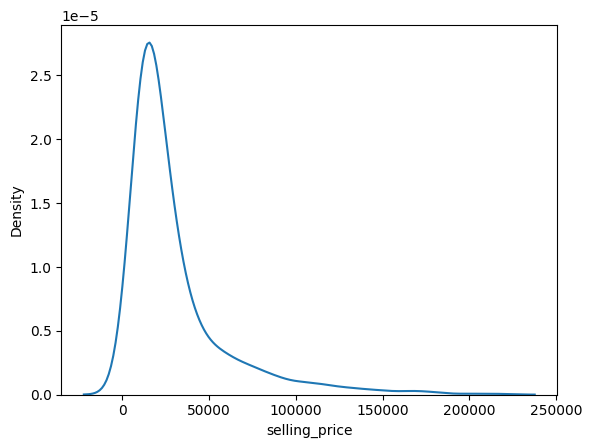

In [102]:
sns.kdeplot(df['selling_price'])

<Axes: ylabel='Frequency'>

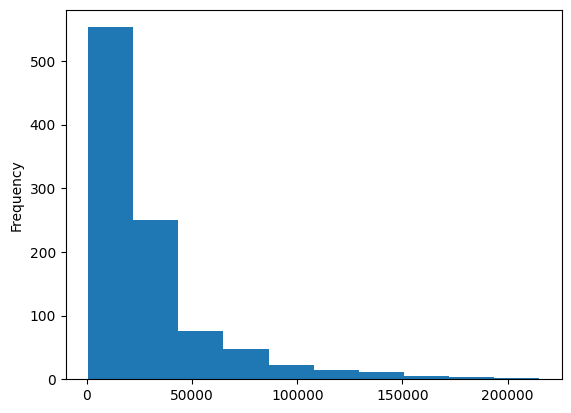

In [103]:
df['selling_price'].plot(kind = 'hist')

co relation between **brand** and **selling price**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, 'OnePlus'),
  Text(1, 0, 'Samsung'),
  Text(2, 0, 'Motorola'),
  Text(3, 0, 'Realme'),
  Text(4, 0, 'Apple'),
  Text(5, 0, 'Xiaomi'),
  Text(6, 0, 'Nothing'),
  Text(7, 0, 'Oppo'),
  Text(8, 0, 'Vivo'),
  Text(9, 0, 'OPPO'),
  Text(10, 0, 'Poco'),
  Text(11, 0, 'iQOO'),
  Text(12, 0, 'Jio'),
  Text(13, 0, 'Gionee'),
  Text(14, 0, 'Tecno'),
  Text(15, 0, 'Tesla'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Infinix'),
  Text(18, 0, 'Nokia'),
  Text(19, 0, 'Cola'),
  Text(20, 0, 'Letv'),
  Text(21, 0, 'POCO'),
  Text(22, 0, 'iKall'),
  Text(23, 0, 'LeEco'),
  Text(24, 0, 'Duoqin'),
  Text(25, 0, 'Lava'),
  Text(26, 0, 'Honor'),
  Text(27, 0, 'Nubia'),
  Text(28, 0, 'Redmi'),
  Text

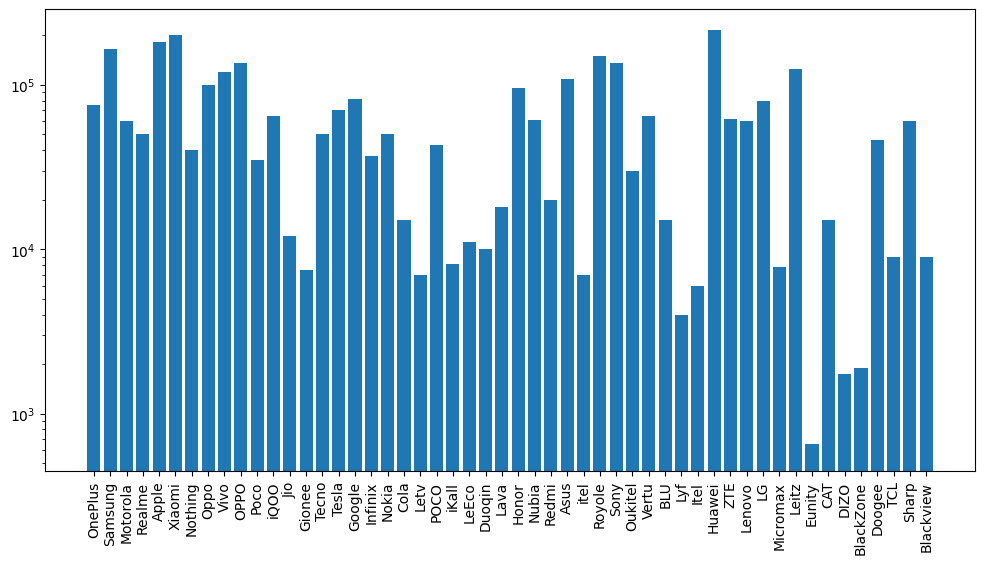

In [104]:
plt.figure(figsize=(12,6))
plt.bar(df['brand'],df['selling_price'] ,log=True)
plt.xticks(rotation = 'vertical')

In [105]:
df['brand'].nunique()

52

In [106]:
df['sim type'].value_counts()

sim type
Dual Sim      967
Single Sim     17
Name: count, dtype: int64

<Axes: ylabel='count'>

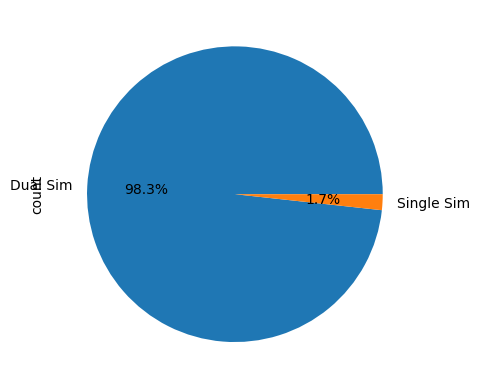

In [107]:
df['sim type'].value_counts().plot(kind = 'pie' , autopct = '%0.1f%%')

([0, 1], [Text(0, 0, 'Dual Sim'), Text(1, 0, 'Single Sim')])

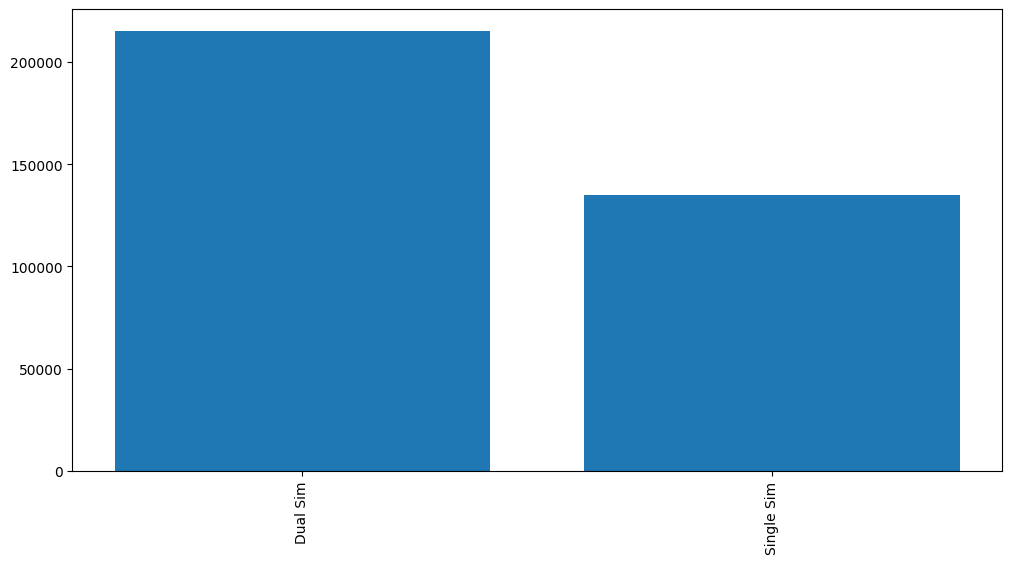

In [108]:
plt.figure(figsize=(12,6))
plt.bar(df['sim type'],df['selling_price'] )
plt.xticks(rotation = 'vertical')

<Axes: ylabel='count'>

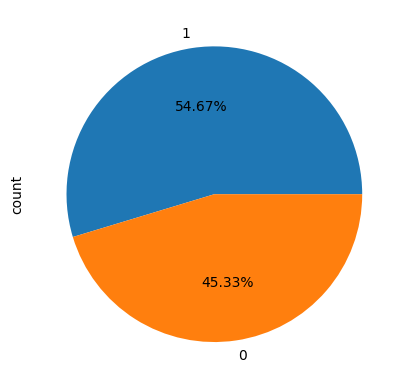

In [109]:
df['is 5G'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

<BarContainer object of 984 artists>

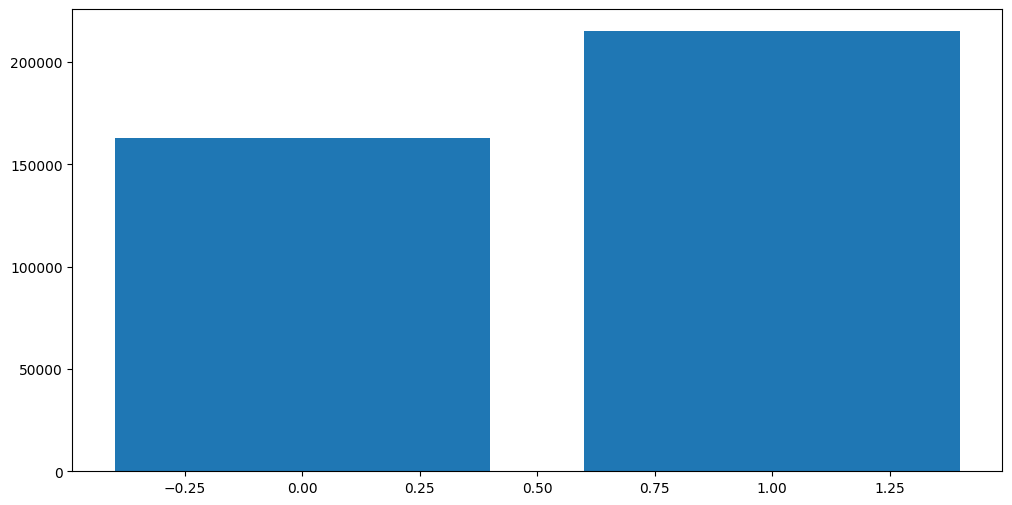

In [110]:
plt.figure(figsize=(12,6))
plt.bar(df['is 5G'],df['selling_price'] )

<BarContainer object of 984 artists>

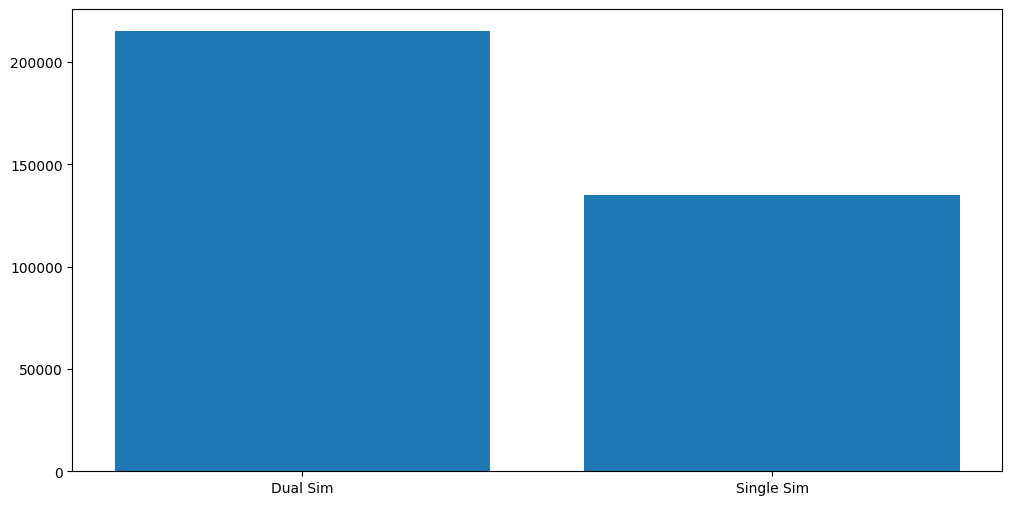

In [111]:
plt.figure(figsize=(12,6))
plt.bar(df['sim type'],df['selling_price'] )

<Axes: ylabel='count'>

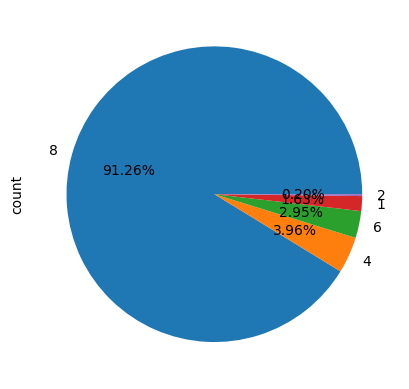

In [112]:
df['cores'].value_counts().plot(kind='pie' , autopct='%0.2f%%')

<BarContainer object of 984 artists>

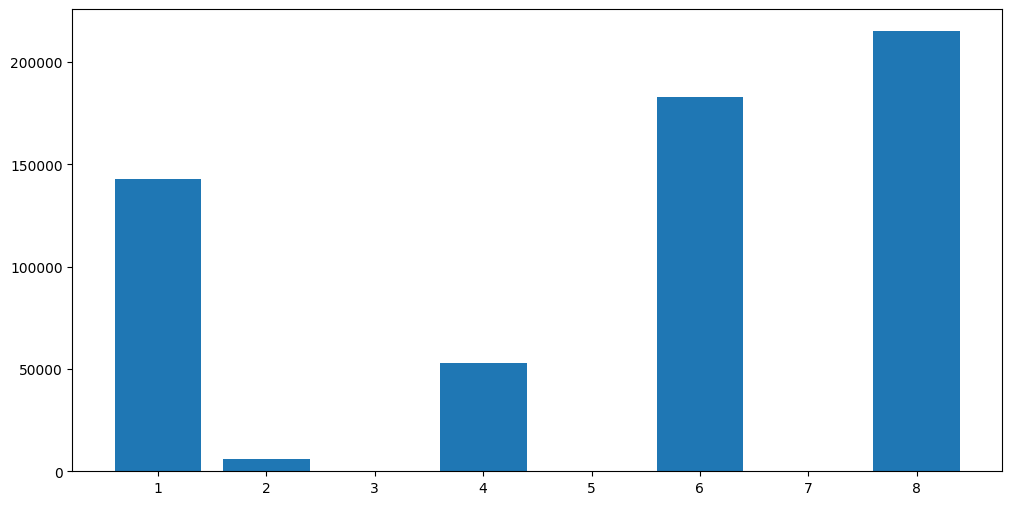

In [113]:
plt.figure(figsize=(12,6))
plt.bar(df['cores'],df['selling_price'] )

<Axes: ylabel='count'>

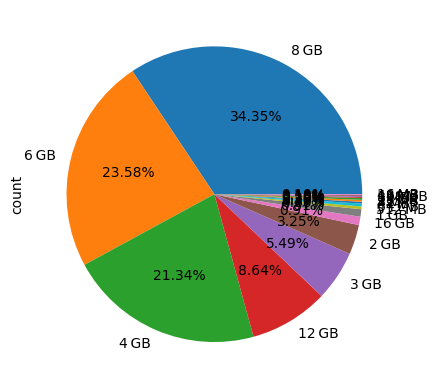

In [114]:
df['RAM'].value_counts().plot(kind='pie' , autopct = '%0.2f%%')

<BarContainer object of 984 artists>

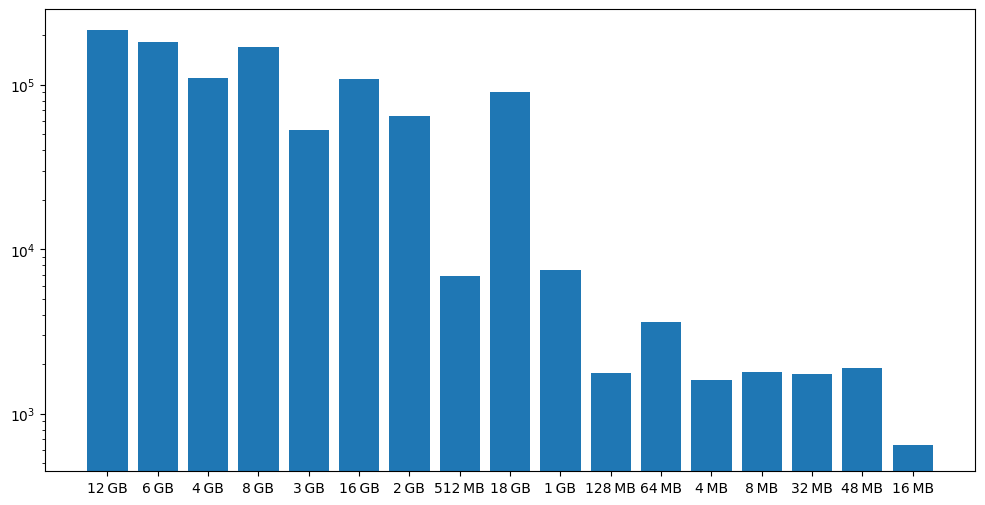

In [115]:
plt.figure(figsize=(12,6))
plt.bar(df['RAM'],df['selling_price']  , log = True)

<Axes: ylabel='count'>

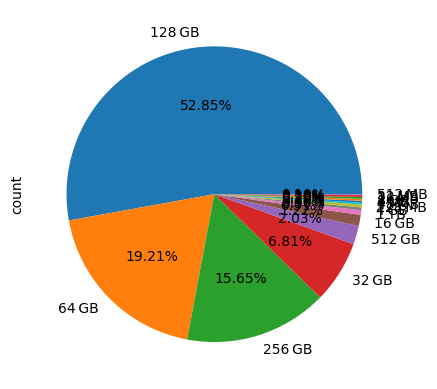

In [116]:
df['ROM'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

<BarContainer object of 984 artists>

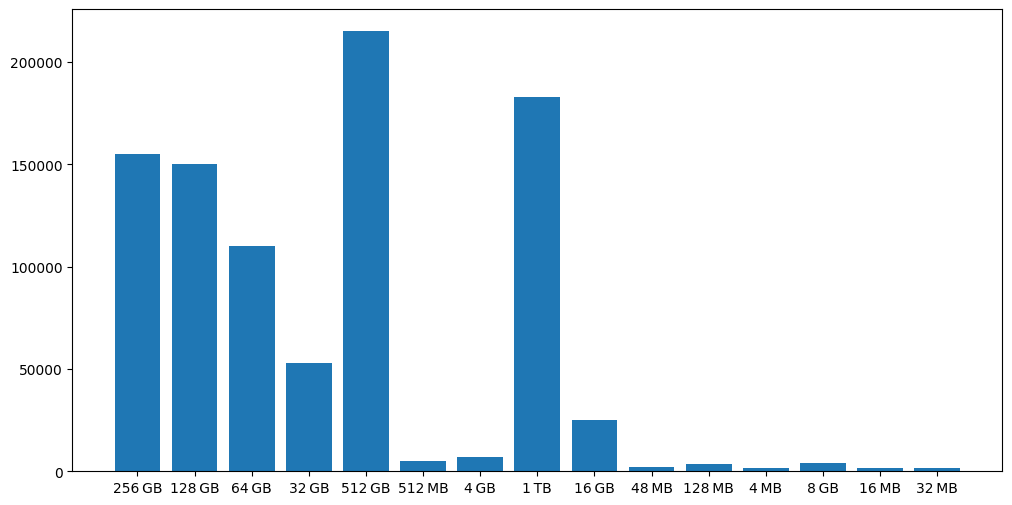

In [117]:
plt.figure(figsize=(12,6))
plt.bar(df['ROM'],df['selling_price'] )

In [118]:
df.columns

Index(['model', 'brand', 'selling_price', 'sim type', 'is 5G', 'cores', 'RAM',
       'ROM', 'battery_mAh', 'is_fast', 'display_size', 'refresh rate',
       'notch', 'rear camera count', 'rear primary cam', 'front primary cam'],
      dtype='object')

<Axes: ylabel='count'>

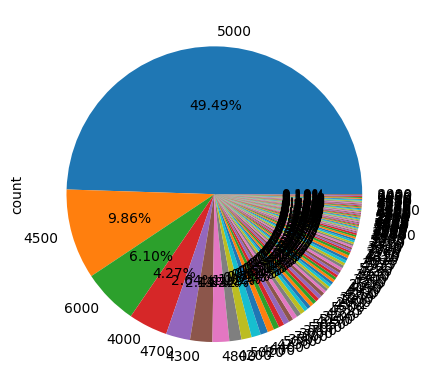

In [119]:
df['battery_mAh'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

In [120]:
df['battery_mAh'].describe()

count      984.000000
mean      4763.869919
std       1088.418959
min        800.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_mAh, dtype: float64

In [121]:
df[df['battery_mAh'] == 22000]

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
847,Doogee V Max,Doogee,45999,Dual Sim,1,8,12 GB,256 GB,22000,1,6.58,120,Water Drop,Triple,108.0,32.0


<BarContainer object of 984 artists>

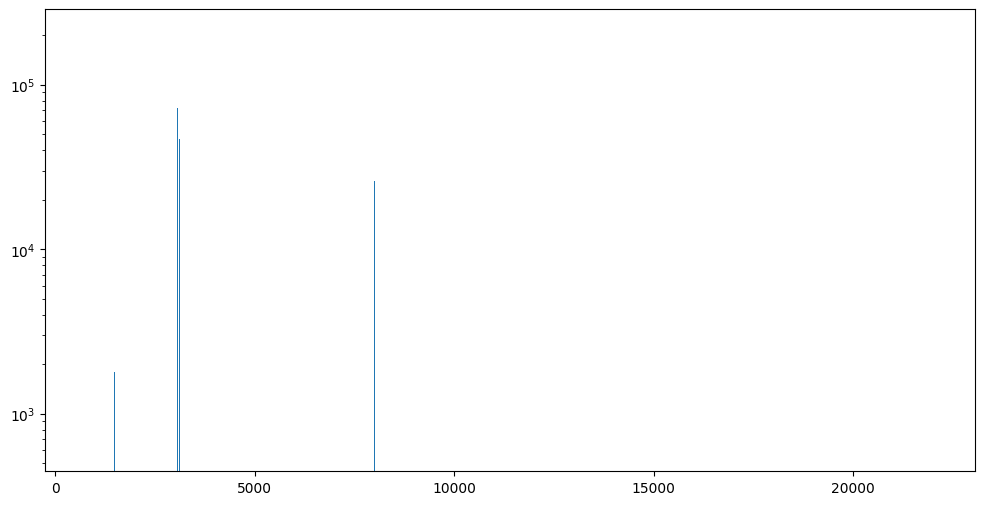

In [122]:
plt.figure(figsize=(12,6))
plt.bar(df['battery_mAh'],df['selling_price'] , log = True)

<Axes: ylabel='count'>

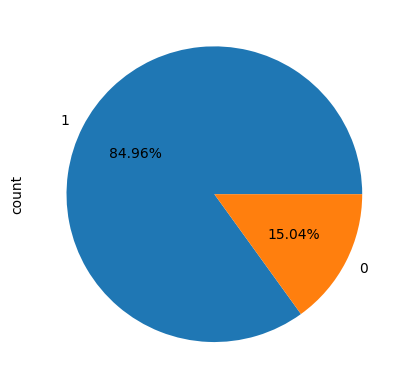

In [123]:
df['is_fast'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%')

<BarContainer object of 984 artists>

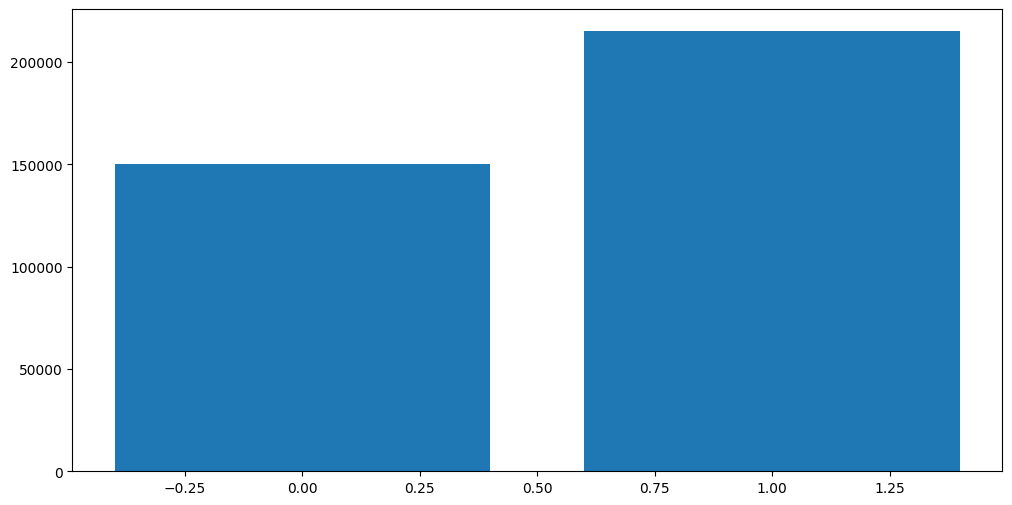

In [124]:
plt.figure(figsize=(12,6))
plt.bar(df['is_fast'],df['selling_price'] )

<Axes: ylabel='count'>

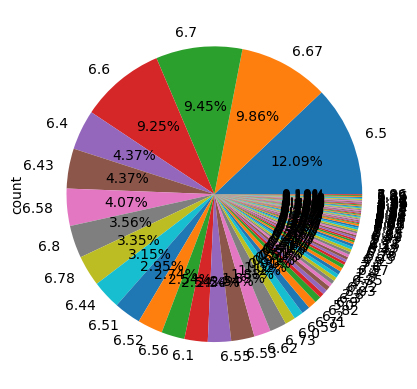

In [125]:
df['display_size'].value_counts().plot(kind='pie' , autopct='%0.2F%%')

<BarContainer object of 984 artists>

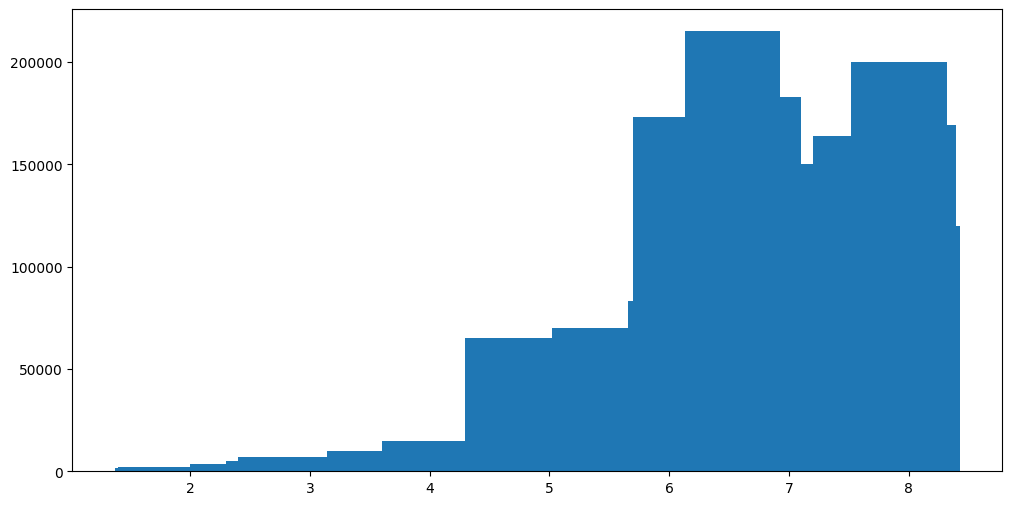

In [126]:
plt.figure(figsize=(12,6))
plt.bar(df['display_size'],df['selling_price'] )

<Axes: ylabel='count'>

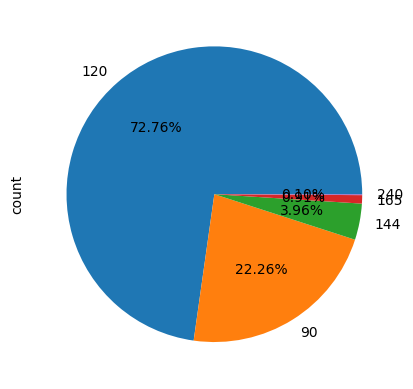

In [127]:
df['refresh rate'].value_counts().plot(kind='pie' , autopct='%.2f%%')

<BarContainer object of 984 artists>

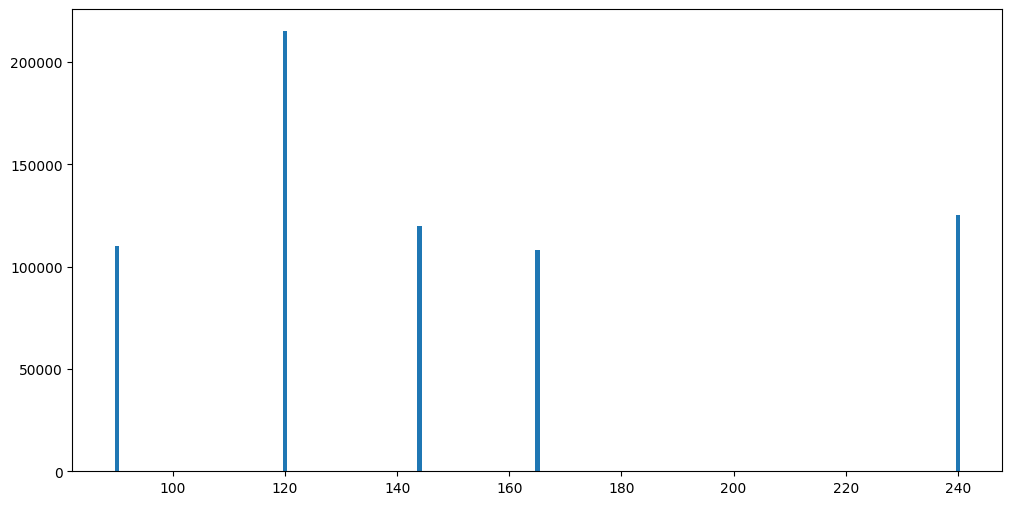

In [128]:
plt.figure(figsize=(12,6))
plt.bar(df['refresh rate'],df['selling_price'] )

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
df.head(1)

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
0,OnePlus 11 5G,OnePlus,54999,Dual Sim,1,8,12 GB,256 GB,5000,1,6.7,120,Punch Hole,Triple,50.0,16.0


In [131]:
encoder = LabelEncoder()

df['brand'] = encoder.fit_transform(df['brand'])
df['sim type'] = encoder.fit_transform(df['sim type'])
df['notch'] = encoder.fit_transform(df['notch'])
df['rear camera count'] = encoder.fit_transform(df['rear camera count'])

In [132]:
df.sample(5)

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
303,Xiaomi Mi 11 Lite NE 5G,47,21890,0,1,8,6 GB,128 GB,4250,1,6.55,90,2,3,64.0,20.0
596,Apple iPhone 7s,0,52990,1,0,4,3 GB,32 GB,2230,0,4.70,120,2,2,13.0,7.0
823,Xiaomi Mi 11X Pro,47,30990,0,1,8,8 GB,128 GB,4520,1,6.67,120,2,3,108.0,20.0
587,Xiaomi Redmi Note 8 2021,47,9990,0,0,8,4 GB,64 GB,4000,1,6.30,120,4,1,48.0,13.0
164,Xiaomi Redmi Note 10S (6GB RAM + 128GB),47,11999,0,0,8,6 GB,128 GB,5000,1,6.43,120,2,1,64.0,13.0


In [133]:
def get_GB(x):
  if 'GB' in x :
    return int(x.split('\u2009GB')[0])
  else :
    temp = int(x.split('\u2009MB')[0])

    return temp /1024

In [134]:
df['RAM'] = df['RAM'].apply(get_GB)

In [135]:
def get_TB(x):
  if 'GB' in x :
    return int(x.split('\u2009GB')[0])
  elif 'TB' in x :
    temp = int(x.split('\u2009TB') [0]) * 1024
    return temp
  else :
    temp = int(x.split('\u2009MB')[0])

    return temp /1024

In [136]:
df['ROM'] = df['ROM'].apply(get_TB)

In [137]:
df['ROM'].describe()

count     984.000000
mean      138.013283
std       106.746392
min         0.003906
25%        64.000000
50%       128.000000
75%       128.000000
max      1024.000000
Name: ROM, dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              984 non-null    object 
 1   brand              984 non-null    int64  
 2   selling_price      984 non-null    int64  
 3   sim type           984 non-null    int64  
 4   is 5G              984 non-null    int64  
 5   cores              984 non-null    int64  
 6   RAM                984 non-null    float64
 7   ROM                984 non-null    float64
 8   battery_mAh        984 non-null    int64  
 9   is_fast            984 non-null    int64  
 10  display_size       984 non-null    float64
 11  refresh rate       984 non-null    int64  
 12  notch              984 non-null    int64  
 13  rear camera count  984 non-null    int64  
 14  rear primary cam   984 non-null    float64
 15  front primary cam  984 non-null    float64
dtypes: float64(5), int64(10), 

In [139]:
df.head()

,model,brand,selling_price,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
0,OnePlus 11 5G,31,54999,0,1,8,12.0,256.0,5000,1,6.70,120,2,3,50.0,16.0
1,OnePlus Nord CE 2 Lite 5G,31,19989,0,1,8,6.0,128.0,5000,1,6.59,120,2,3,64.0,16.0
2,Samsung Galaxy A14 5G,39,16499,0,1,8,4.0,64.0,5000,1,6.60,90,4,3,50.0,13.0
3,Motorola Moto G62 5G,26,14999,0,1,8,6.0,128.0,5000,1,6.55,120,2,3,50.0,16.0
4,Realme 10 Pro Plus,36,24999,0,1,8,6.0,128.0,5000,1,6.70,120,2,3,108.0,16.0


Text(0, 0.5, 'selling price')

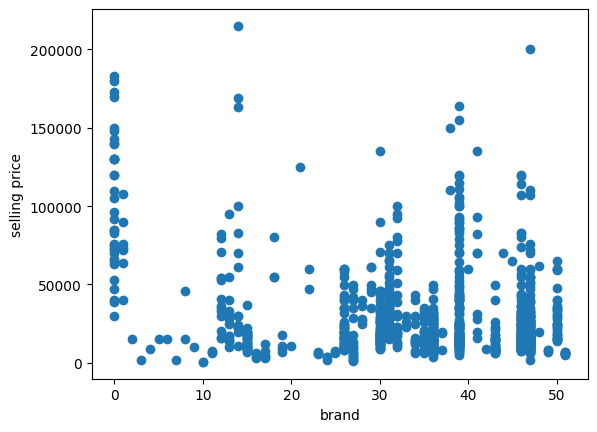

In [140]:
plt.scatter(df['brand'] , df['selling_price'])
plt.xlabel('brand')
plt.ylabel('selling price')

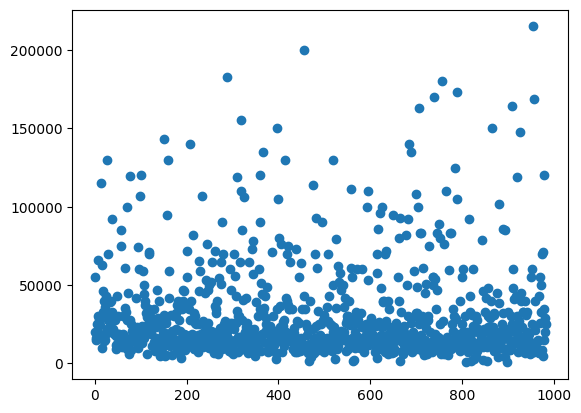

In [141]:
plt.scatter(range(df.shape[0]) ,df['selling_price'])

In [142]:
df.columns

Index(['model', 'brand', 'selling_price', 'sim type', 'is 5G', 'cores', 'RAM',
       'ROM', 'battery_mAh', 'is_fast', 'display_size', 'refresh rate',
       'notch', 'rear camera count', 'rear primary cam', 'front primary cam'],
      dtype='object')

# model Building

In [143]:
x=df[['brand', 'sim type', 'is 5G', 'cores', 'RAM',
       'ROM', 'battery_mAh', 'is_fast', 'display_size', 'refresh rate',
       'notch', 'rear camera count', 'rear primary cam', 'front primary cam']]
y=df.iloc[:,2]

In [144]:
x

,brand,sim type,is 5G,cores,RAM,ROM,battery_mAh,is_fast,display_size,refresh rate,notch,rear camera count,rear primary cam,front primary cam
0,31,0,1,8,12.0,256.0,5000,1,6.70,120,2,3,50.0,16.0
1,31,0,1,8,6.0,128.0,5000,1,6.59,120,2,3,64.0,16.0
2,39,0,1,8,4.0,64.0,5000,1,6.60,90,4,3,50.0,13.0
3,26,0,1,8,6.0,128.0,5000,1,6.55,120,2,3,50.0,16.0
4,36,0,1,8,6.0,128.0,5000,1,6.70,120,2,3,108.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,26,0,1,8,8.0,128.0,5000,1,6.67,120,2,3,64.0,16.0
980,13,0,1,8,6.0,128.0,5000,1,6.50,120,4,3,48.0,8.0
981,34,0,1,8,8.0,256.0,5080,1,6.60,144,2,3,64.0,16.0
982,26,0,1,8,6.0,128.0,5000,1,6.80,120,2,3,108.0,32.0


In [145]:
y

0      54999
1      19989
2      16499
3      14999
4      24999
       ...  
979    34990
980    14990
981    28990
982    19990
983    24990
Name: selling_price, Length: 984, dtype: int64

In [146]:
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size = 0.2)

In [147]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
x_train

array([[-2.73973866e+00,  7.71611700e+00, -1.08352810e+00, ...,
        -2.06147448e-03, -1.04772156e+00, -7.96894340e-01],
       [ 3.48428755e-01, -1.29598864e-01, -1.08352810e+00, ...,
        -8.13251682e-01, -1.07659422e+00, -5.28542626e-01],
       [ 3.48428755e-01, -1.29598864e-01, -1.08352810e+00, ...,
        -8.13251682e-01,  2.05667232e-02, -7.07443769e-01],
       ...,
       [ 9.02715214e-01, -1.29598864e-01,  9.22910996e-01, ...,
         8.09128733e-01,  1.69518079e+00,  1.43936994e+00],
       [ 1.10877415e-01, -1.29598864e-01,  9.22910996e-01, ...,
         8.09128733e-01,  2.05667232e-02,  1.43936994e+00],
       [ 3.48428755e-01, -1.29598864e-01,  9.22910996e-01, ...,
        -8.13251682e-01,  1.69518079e+00,  1.43936994e+00]])

In [149]:
lr = LinearRegression()
lr.fit(x_train , y_train)
r2_score(y_test, lr.predict(x_test))

0.6925402015533848

<p color = 'green'>  accuracy of Linear Regression : 69.25%

In [150]:
ridge = Ridge(alpha = 10)
ridge.fit(x_train ,y_train)
r2_score(y_test, ridge.predict(x_test))

0.6924079719892317

<p color = 'green'>  accuracy of Ridge Regression : 69.24%

In [151]:
dt = DecisionTreeRegressor(max_depth = 9)
dt.fit(x_train , y_train)

print( 'training',r2_score(y_train, dt.predict(x_train)))
print('testing',r2_score(y_test, dt.predict(x_test)))
# plot_tree(dt)

training 0.9633149085487126
testing 0.7213848523509443


<p color = 'green'>  accuracy of Decision tree regressior : 72.13%

In [152]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
print( 'training',r2_score(y_train, rf.predict(x_train)))
print('testing',r2_score(y_test, rf.predict(x_test)))

training 0.9697943884523589
testing 0.7933985574692848


<p color = 'green'>  accuracy of Random forest Regressior : 79.33%

In [153]:
for i in range(1, 100):
  xg_r = xg.XGBRegressor(n_estimators = i)
  xg_r.fit(x_train ,y_train)
  print( i , r2_score(y_test, xg_r.predict(x_test)))

1 0.3463468673049276
2 0.546256039642876
3 0.6381989209687462
4 0.7068589212340353
5 0.7426273520567133
6 0.765282023962608
7 0.7753684134261063
8 0.7852738042556113
9 0.7913645180234206
10 0.794252675992347
11 0.7974065023803568
12 0.800605782058145
13 0.8034626031503618
14 0.8050662642612754
15 0.8064540620966643
16 0.8075982198185006
17 0.807871092998849
18 0.807662233910165
19 0.8086393222242119
20 0.8128883905040135
21 0.8123496450635901
22 0.8119490774002527
23 0.8133181398203111
24 0.8132689517040935
25 0.812064646598975
26 0.8114241135530778
27 0.8112726178941214
28 0.811142145658542
29 0.8120186444613118
30 0.8126962054544418
31 0.8134912854674743
32 0.8103093022794959
33 0.809875237640683
34 0.8105640265438292
35 0.8110627335425731
36 0.8122515348826651
37 0.8142939376218965
38 0.8133762488293587
39 0.81264427005969
40 0.8126810659011449
41 0.8131664231198232
42 0.8133788981454033
43 0.8135262661762759
44 0.8132530277716138
45 0.8130889504530365
46 0.813152344464583
47 0.8130

In [154]:
print( 'training',r2_score(y_train, xg_r.predict(x_train)))
print('testing',r2_score(y_test, xg_r.predict(x_test)))

training 0.9946443550706394
testing 0.8157812506042292


<p color = 'green'>  accuracy of xg Boost Regression : 81.57%